In [119]:
class Lang():
    def __init__(self, image): # image is a PIL image 
        self.tool = pyocr.get_available_tools()[0]
        self.lang = self.tool.get_available_languages()[0]
        self.ocr_noise = [' ','','.',',',';','W','w']
        self.image = image 
    
    def get_text(self):
        """Returns one string of all text detected."""
        txt = self.lang.tool.image_to_string(
            self.image,
            lang=self.lang,
            builder=pyocr.builders.TextBuilder()
        )
        return txt
    
    
    def get_line_and_word_boxes(self):
        """line.word_boxes is a list of word boxes (the individual words in the line)
           line.content is the whole text of the line
           line.position is the position of the whole line on the page (in pixels)"""
        line_and_word_boxes = self.tool.image_to_string(
            self.image, lang="eng",
            builder=pyocr.builders.LineBoxBuilder()
        )
        return line_and_word_boxes


    def get_word_boxes(self):
        """Returns boxes around words separated by a space.
            box.content is the word in the box.
            box.position is the position on the page (in pixels)"""
        word_boxes = self.lang.tool.image_to_string(
            self.image,
            lang="eng",
            builder=pyocr.builders.WordBoxBuilder()
        )
        return word_boxes

    def get_digits(self):
        """Returns a string of digits."""
        digits = self.lang.tool.image_to_string(
            self.image,
            lang=lang,
            builder=pyocr.tesseract.DigitBuilder()
        )
        return digits
    
    def crop_title(self):
        """Find the first characters in the image and crop them out."""
        top_line_and_words = self.get_line_and_word_boxes()
        top_line_and_words = [boxes for boxes in self.get_line_and_word_boxes() if boxes.content not in self.ocr_noise]
        if top_line_and_words:
            topleft, bottomright = top_line_and_words[0].position
            print(topleft, bottomright)
            if topleft[1] <= self.title_position:
                self.image = self.image.crop((0, bottomright[1], self.width, self.height))
                self.update_img()
                self.update_size()
    
    def get_title(self): 
        top_line_and_words = self.get_line_and_word_boxes()
        top_line_and_words = [boxes for boxes in self.get_line_and_word_boxes() if boxes.content not in self.ocr_noise]
        print(len(top_line_and_words))
        if top_line_and_words: 
            topleft, bottomright = top_line_and_words[0].position
            title = top_line_and_words[0].content
            print(title)
            return title
        else: 
            print("no title found")
            
    def write_caption(self, label): 
        title = self.get_title()
        if label == "1": 
            return "Increase in %s" % title
        elif label == "-1":
            return "Decrease in %s" % title
        else: 
            return "Little net change in %s" % title


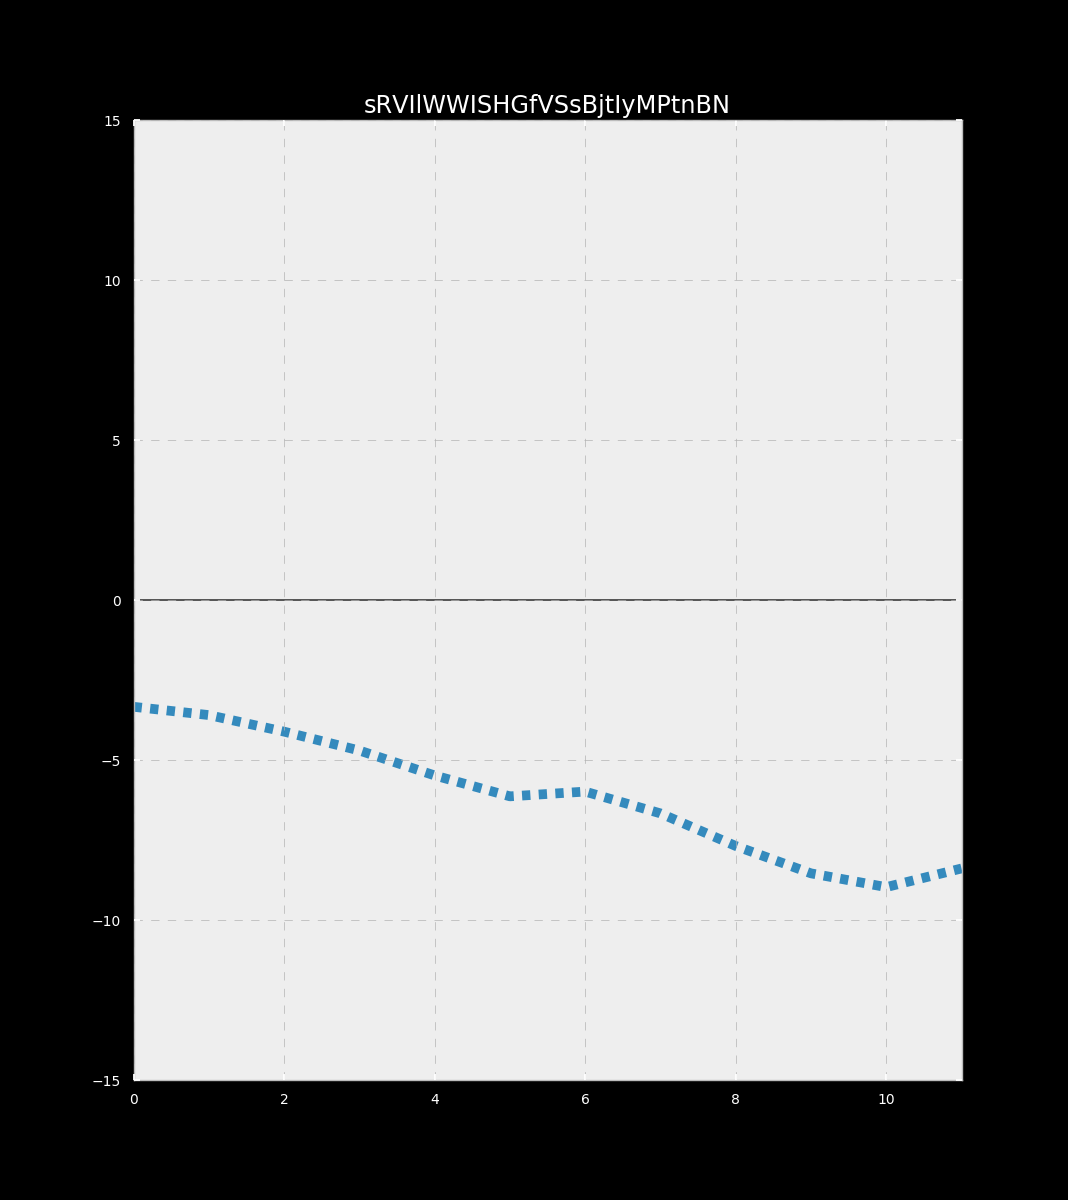

In [120]:
from PIL import Image, ImageDraw, ImageFont
import random
import os
import pyocr

def make_image(path):
    image = Image.open(path)
    image = image.convert('RGB')
    return image

path = os.path.expanduser('~/good_title.png')
im = make_image(path)
im

In [121]:
lang = Lang(im)


In [122]:
lang.write_caption("-1")

1
SRVIIWWISHGfVSSBthyMPtnBN


'Decrease in SRVIIWWISHGfVSSBthyMPtnBN'

In [128]:
import matplotlib as mpl
labels = []

with open(os.path.expanduser('~/outputs.txt'), 'r') as infile: 
    for line in infile: 
        labels.append(line.strip().split(" ")[:2])
        
labels

[['/home/ubuntu/graph-trend-understanding/data/test/quartz/africa_inc.png',
  '2'],
 ['/home/ubuntu/graph-trend-understanding/data/test/quartz/china_neutral.png',
  '1'],
 ['/home/ubuntu/graph-trend-understanding/data/test/quartz/chinese_dec.png',
  '0'],
 ['/home/ubuntu/graph-trend-understanding/data/test/quartz/donations_inc.png',
  '2'],
 ['/home/ubuntu/graph-trend-understanding/data/test/scraped_nathan/line_graph_169.jpg',
  '2'],
 ['/home/ubuntu/graph-trend-understanding/data/test/scraped_nathan/line_graph_145.jpg',
  '1']]

9
China's current account balance as a share of GDP


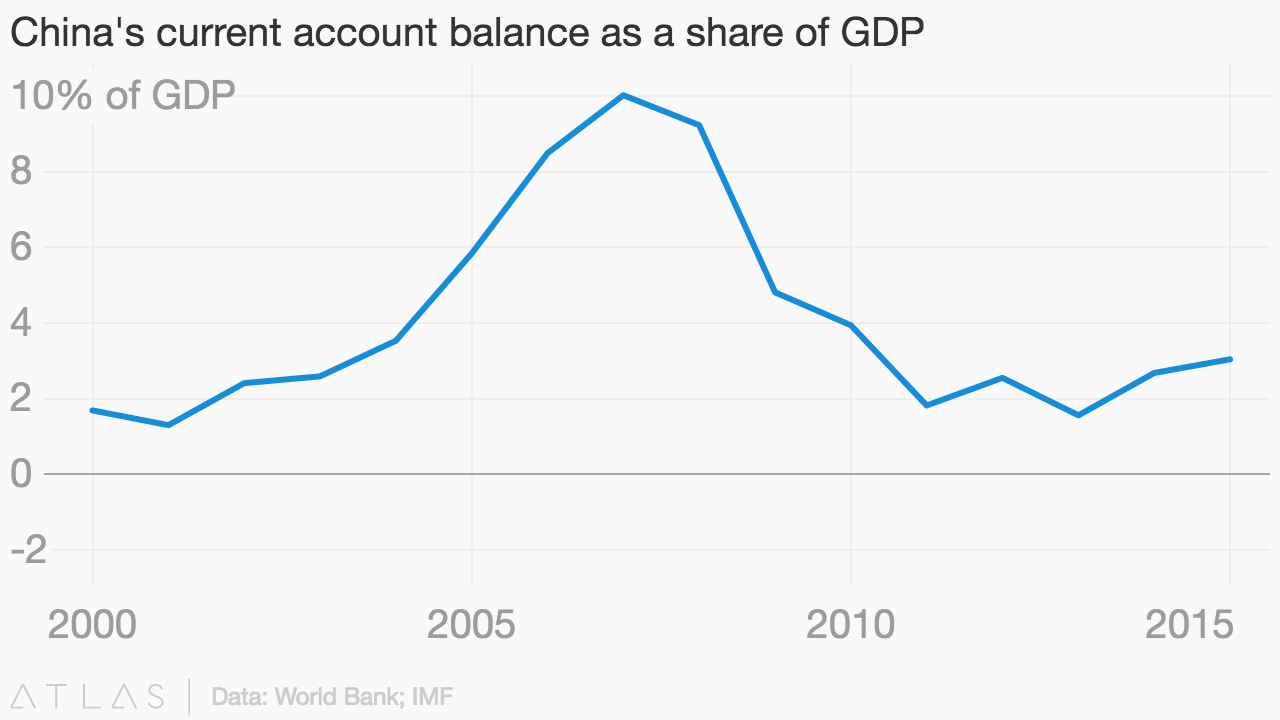

Little net change in China's current account balance as a share of GDP


In [134]:
i = 1

path, label = labels[i]
im = make_image(path)
lang = Lang(im)
caption = lang.write_caption(str(int(label) -1))

from IPython.display import Image, display, clear_output

image = Image(path)
display(image)
print(caption)


# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# image = mpimg.imread(path)
# fig = plt.imshow(image)
# fig.text(.1,.1,caption)
# plt.show()

In [127]:
lang = Lang(im)
lang.write_caption(str(int(label) -1))

9
China's current account balance as a share of GDP


"Little net change in China's current account balance as a share of GDP"